In [2]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
dt=pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [76]:
#creating new column names for the given data
new_dt = pd.DataFrame(columns=["DT","ST"])
new_dt["DT"] = pd.Series(dt["Delivery Time"]) 
new_dt["ST"] = pd.Series(dt["Sorting Time"]) 
new_dt

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [77]:
new_dt.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x210f543e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210f543efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210f64952b0>],
 'medians': [<matplotlib.lines.Line2D at 0x210f6499b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x210f649c250>],
 'means': []}

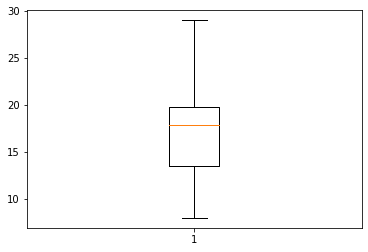

In [78]:
plt.boxplot(new_dt.DT)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

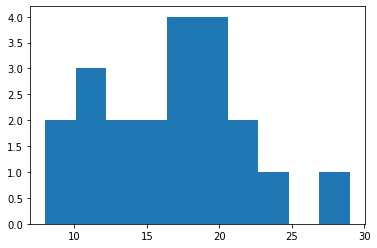

In [79]:
plt.hist(new_dt.DT)

{'whiskers': [<matplotlib.lines.Line2D at 0x210f6723610>,
 'caps': [<matplotlib.lines.Line2D at 0x210f67d53d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210f6723af0>],
 'medians': [<matplotlib.lines.Line2D at 0x210f67d95e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x210f67d9850>],
 'means': []}

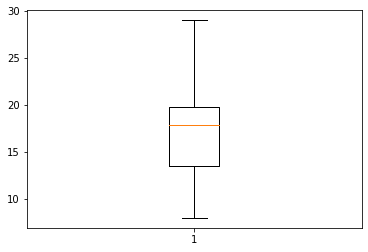

In [80]:
plt.boxplot(new_dt.DT)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

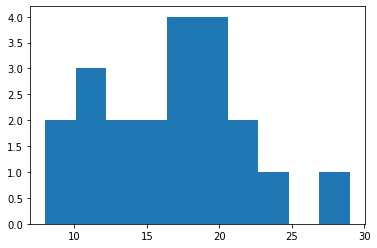

In [81]:
plt.hist(new_dt.DT)

Text(0, 0.5, 'ST')

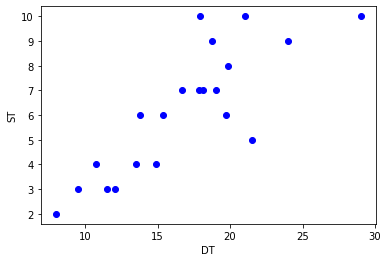

In [129]:
plt.plot(new_dt.DT,new_dt.ST,"bo")
plt.xlabel('DT')
plt.ylabel('ST')

In [83]:
new_dt.ST.corr(new_dt.DT)

0.8259972607955325

In [87]:
#linear model
import statsmodels.formula.api as smf 
model=smf.ols("ST~DT",data=new_dt).fit()



In [88]:
model.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [89]:
# pvalue>0.05 indicates that it is less insignificant
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        23:07:56   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
pred=model.predict(new_dt.iloc[:,0])
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [92]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [93]:
rmse_lin = np.sqrt(np.mean((np.array(new_dt.DT)-np.array(pred))**2))
rmse_lin 

10.99092151473798

Text(0, 0.5, 'ST')

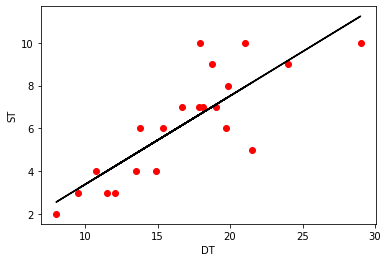

In [95]:
import matplotlib.pylab as plt
plt.scatter(x=new_dt.DT,y=new_dt.ST,color='red')
plt.plot(new_dt.DT,pred,color='black')
plt.xlabel('DT')
plt.ylabel('ST')

In [114]:
model2 = smf.ols('ST~np.log(DT)',data=new_dt).fit()
model2.params


Intercept    -12.499233
np.log(DT)     6.735548
dtype: float64

In [115]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        19:44:27   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
pred2=model2.predict(new_dt.iloc[:,0])
pred2


0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [104]:
model2.resid

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [109]:
pred2.corr(new_dt.ST)

0.843177263722415

In [112]:
rmse_log = np.sqrt(np.mean((np.array(new_dt['ST'])-np.array(pred2))**2))
rmse_log

1.3337477286899517

Text(0, 0.5, 'ST')

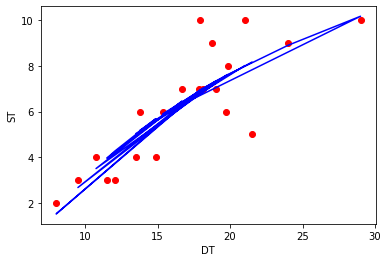

In [118]:
import matplotlib.pylab as plt
plt.scatter(x=new_dt.DT,y=new_dt.ST,color='red')
plt.plot(new_dt.DT,pred2,color='blue')
plt.xlabel('DT')
plt.ylabel('ST')

In [120]:
model3 = smf.ols('np.log(ST)~DT',data=new_dt).fit()


In [121]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        20:22:51   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
DT             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
model3.params


Intercept    0.437237
DT           0.076901
dtype: float64

In [124]:
pred_log = model3.predict(pd.DataFrame(new_dt['DT'])) 
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [125]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [126]:
model3.resid

0     0.250437
1    -0.089100
2    -0.164263
3    -0.085625
4    -0.364767
5     0.174099
6     0.047563
7    -0.069179
8     0.488829
9     0.318103
10    0.117267
11    0.122377
12    0.225972
13   -0.222981
14   -0.263738
15   -0.195222
16    0.297140
17    0.116005
18   -0.359294
19    0.137537
20   -0.481160
dtype: float64

In [131]:
rmse_exp = np.sqrt(np.mean((np.array(new_dt['ST'])-np.array(pred3))**2))
rmse_exp

1.79214500168698

In [128]:
pred3.corr(new_dt.ST)

0.7472768828616799

Text(0, 0.5, 'ST')

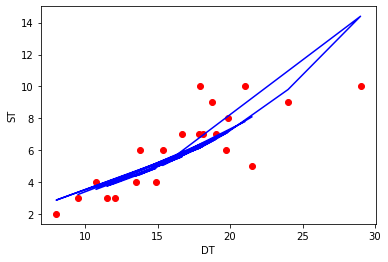

In [132]:
import matplotlib.pylab as plt
plt.scatter(x=new_dt.DT,y=new_dt.ST,color='red')
plt.plot(new_dt.DT,pred3,color='blue')
plt.xlabel('DT')
plt.ylabel('ST')